In [1]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os 
import glob
import random
import numpy as np
import IPython

In [2]:
audio = "./data/blues.00001.wav"
data, sr = librosa.load(audio, sr=22050) # librosa.load(오디오 파일 경로, 샘플링 주파수)

### 음성 데이터 STFT 변환

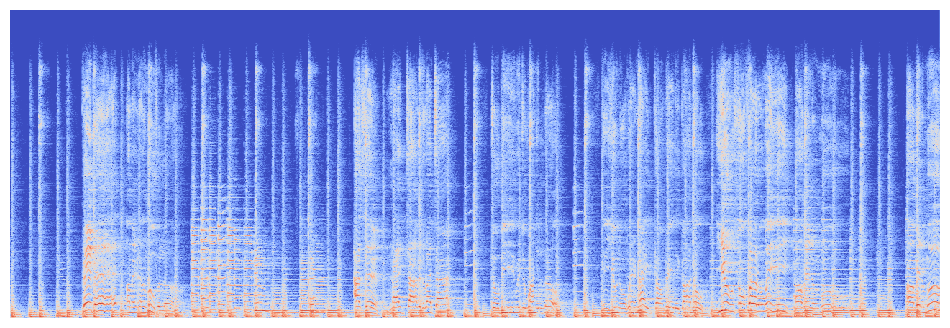

In [3]:
# 1. STFT 계산
stft = librosa.stft(data)

# 2. STFT -> db로 변환
stft_db = librosa.amplitude_to_db(abs(stft))

# 3. STFT 이미지 저장
plt.figure(figsize=(12,4))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.axis('off')
plt.savefig("./data/STFT_original.png", bbox_inches='tight', pad_inches=0)

### 0초 ~ 10초 구간 파형 추출하여 이미지 저장

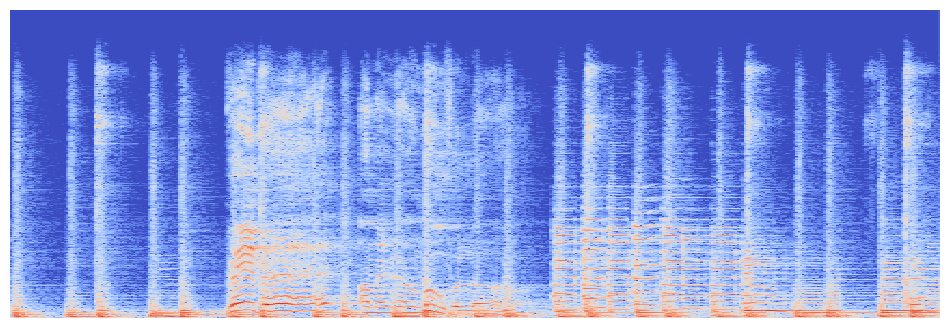

In [4]:
start_time = 0 
end_time = 10
start_sample = sr * start_time
end_sample = sr * end_time
data_selection_stft = data[start_sample : end_sample]

# 0초 ~ 10초 구간 STFT 계산
stft_temp = librosa.stft(data_selection_stft)

# STFT -> db로 변환
stft_db_temp = librosa.amplitude_to_db(abs(stft_temp))

# STFT 이미지 저장
plt.figure(figsize=(12,4))
librosa.display.specshow(stft_db_temp, sr=sr, x_axis='time', y_axis='hz')
plt.axis('off')
plt.savefig("./data/STFT_0-10.png", bbox_inches='tight', pad_inches=0)

### 0초 ~ 10초 STFT 노이즈 추가

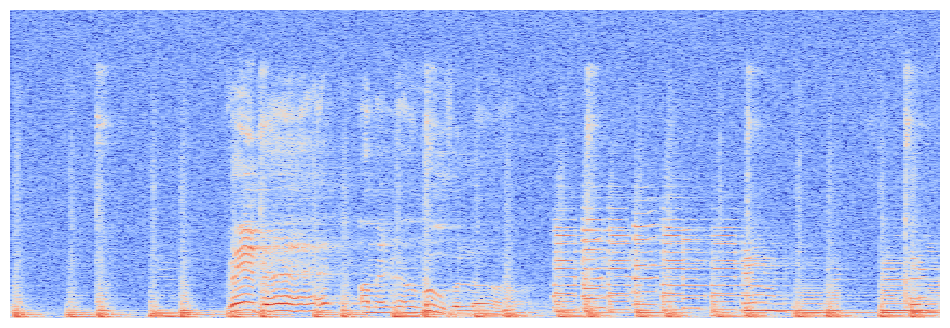

In [5]:
noise = 0.005 * np.random.randn(*data_selection_stft.shape)
augmented_data_section = data_selection_stft + noise

# STFT 계산
augmented_stft = librosa.stft(augmented_data_section)

# STFT 결과 -> db로 변환
augmented_stft_db = librosa.amplitude_to_db(abs(augmented_stft))

# STFT 이미지 저장
plt.figure(figsize=(12,4))
librosa.display.specshow(augmented_stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.axis('off')
plt.savefig("./data/STFT_0-10_aug_noise.png", bbox_inches='tight', pad_inches=0)

### 0초 ~ 10초 구간 파형 추출 이미지 Stetching 추가하여 이미지 저장

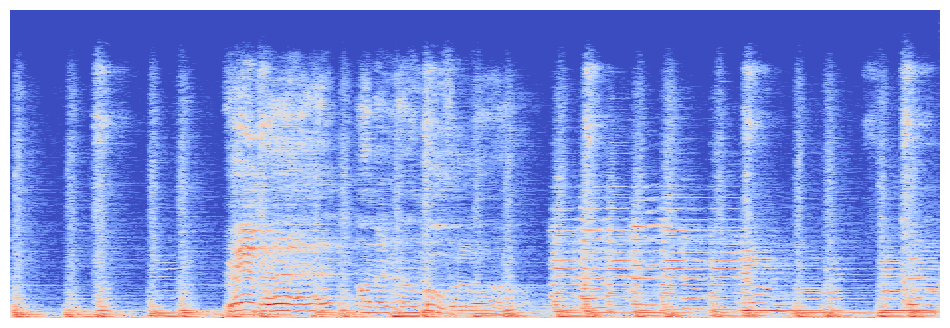

In [6]:
rate = 0.8 + np.random.random() * 0.4 # 0.8 ~ 1.2 사이의 랜덤한 비율 Time stretching
stretched_data_section = librosa.effects.time_stretch(data_selection_stft, rate=rate)

# STFT 계산
stretched_stft = librosa.stft(stretched_data_section)

# STFT 결과 -> db로 변환
stretched_stft_db = librosa.amplitude_to_db(abs(stretched_stft))

plt.figure(figsize=(12,4))
librosa.display.specshow(stretched_stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.axis('off')
plt.savefig("./data/STFT_0-10_aug_stretch.png", bbox_inches='tight', pad_inches=0)